Notebook to classify the naive templates as El, Sp, Im/SB

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import copy

from modules import get_bandpass_dict, Sed

In [2]:
# plotting style
%config InlineBackend.figure_format = 'retina'
plt.style.use('paper.mplstyle')
twocol = 7.1014
onecol = 3.35

In [3]:
bandpass_dict = get_bandpass_dict()

Calculate colors for each set of templates

In [27]:
cwwsb4 = np.loadtxt('templates/cwwsb4.list',dtype=str)
xcolor0 = []
ycolor0 = []
for template in cwwsb4:
    name = 'templates/'+template
    x,y = np.loadtxt(name,unpack=True)
    sed = Sed(x,y)
    
    fluxes = sed.fluxlist(bandpass_dict,['NUV','u','g'])
    xcolor0.append(2.5*np.log10(fluxes[1]/fluxes[0]))
    ycolor0.append(2.5*np.log10(fluxes[2]/fluxes[1]))

cwwsb4_trained = ['El_trained.sed', 'Sbc_trained.sed',
                  'Scd_trained.sed', 'Im_trained.sed',
                  'SB3_trained.sed', 'SB2_trained.sed',
                  '25Myr_trained.sed', '5Myr_trained.sed']
xcolor0_trained = []
ycolor0_trained = []
for template in cwwsb4_trained:
    name = 'templates/'+template
    x,y = np.loadtxt(name,unpack=True)
    sed = Sed(x,y)
    
    fluxes = sed.fluxlist(bandpass_dict,['NUV','u','g'])
    xcolor0_trained.append(2.5*np.log10(fluxes[1]/fluxes[0]))
    ycolor0_trained.append(2.5*np.log10(fluxes[2]/fluxes[1]))
    
N8 = ['N8_'+str(i+1)+'.sed' for i in range(8)]
xcolor8 = []
ycolor8 = []
for template in N8:
    name = 'templates/'+template
    x,y = np.loadtxt(name,unpack=True)
    sed = Sed(x,y)
    
    fluxes = sed.fluxlist(bandpass_dict,['NUV','u','g'])
    xcolor8.append(2.5*np.log10(fluxes[1]/fluxes[0]))
    ycolor8.append(2.5*np.log10(fluxes[2]/fluxes[1]))
    
naive16 = ['N16_'+str(i+1)+'.sed' for i in range(16)]
xcolor16 = []
ycolor16 = []
for template in naive16:
    name = 'templates/'+template
    x,y = np.loadtxt(name,unpack=True)
    sed = Sed(x,y)
    
    fluxes = sed.fluxlist(bandpass_dict,['NUV','u','g'])
    xcolor16.append(2.5*np.log10(fluxes[1]/fluxes[0]))
    ycolor16.append(2.5*np.log10(fluxes[2]/fluxes[1]))

Function that matches the colors to the closest CWWSB4 template

In [24]:
def closest(x,y):
    distances = []
    for i,j in zip(xcolor0,ycolor0):
        distances.append(0*(x-i)**2 + (y-j)**2)
    return np.array(distances).argmin()

Evaluate the function on a grid to make the background of the plot

In [25]:
# Calculate the nearest neighbor grid

X = np.linspace(-2,3,1000)
Y = np.linspace(-0.8,1.05,1000)
Z = []
for y in Y:
    row = []
    for x in X:
        row.append(closest(x,y))
    Z.append(row)

Plot the template colors on top of this grid

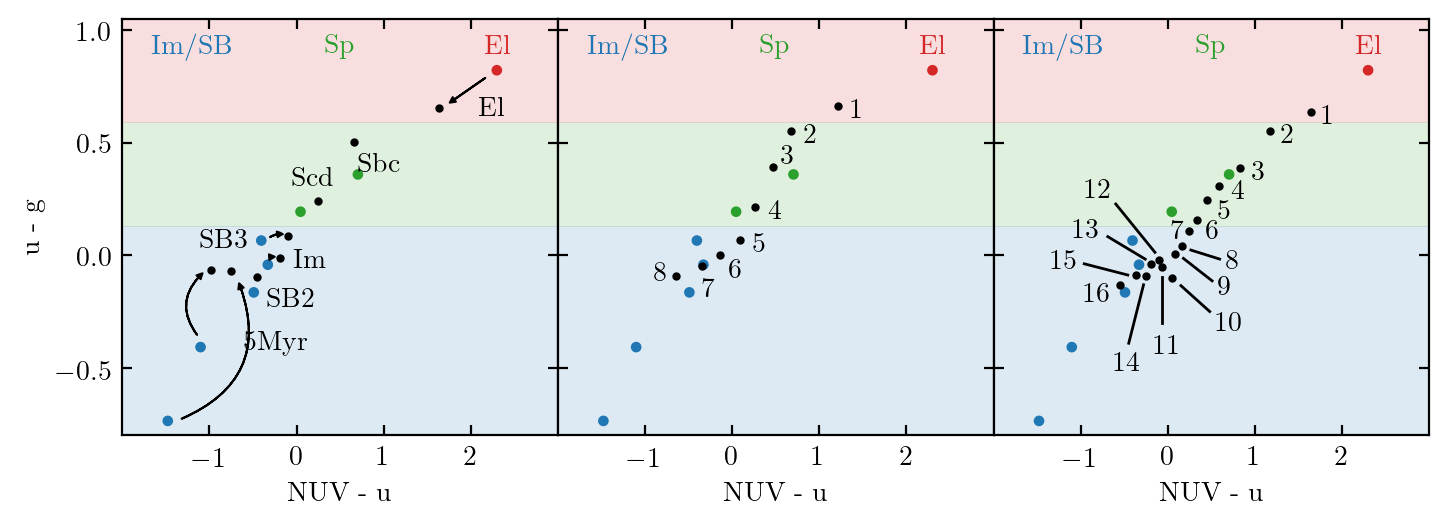

In [28]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(twocol,0.35*twocol),sharey='all')


for ax in [ax1,ax2,ax3]:

    ax.contourf(X,Y,Z,[0,0.5,2.5,10],colors=['C3','C2','C0'],alpha=0.15)

    ax.scatter(xcolor0,ycolor0,c=['C3','C2','C2','C0','C0','C0','C0','C0'],s=8)

    ax.set_xlim(-2,3)
    ax.set_ylim(-0.8,1.05)

    ax.set_xlabel('NUV - u')
    
    ax.set_xticks([-1,0,1,2])

    ax.text(-1.2,0.93,'Im/SB',c='C0',ha='center',va='center')
    ax.text(0.5,0.93,'Sp',c='C2',ha='center',va='center')
    ax.text(2.3,0.93,'El',c='C3',ha='center',va='center')
         
        
# The trained cwwsb4 template colors

ax = ax1

ax.scatter(xcolor0_trained,ycolor0_trained,c='k')

style="Simple,tail_width=0.01,head_width=2,head_length=2"
kw = dict(arrowstyle=style, color="k")
arrows = []
for i,(x,y) in enumerate(zip(xcolor0_trained,ycolor0_trained)):
    if i == 0:
        arrows.append(patches.FancyArrowPatch((xcolor0[i]-0.08,ycolor0[i]-0.02), (x+0.075,y+0.01),connectionstyle="arc3",lw=0.75,**kw))
        ax.annotate('El',(x+0.45,y-0.03))
    if i == 1:
        ax.annotate('Sbc',(x+0.04,y-0.13))
    if i == 2:
        ax.annotate('Scd',(x-0.3,y+0.07))
    if i == 3:
        arrows.append(patches.FancyArrowPatch((xcolor0[i],ycolor0[i]+0.01), (x,y),connectionstyle="arc3,rad=-0.5",lw=0.75,**kw))
        ax.annotate('Im',(x+0.15,y-0.04))
    if i == 4:
        arrows.append(patches.FancyArrowPatch((xcolor0[i]+0.05,ycolor0[i]), (x,y+0.005),connectionstyle="arc3,rad=-0.3",lw=0.75,**kw))
        ax.annotate('SB3',(xcolor0[i]-0.7,ycolor0[i]-0.03))
    if i == 5:
        ax.annotate('SB2',(xcolor0[i]+0.15,ycolor0[i]-0.06))
    if i == 6:
        arrows.append(patches.FancyArrowPatch((xcolor0[i],ycolor0[i]+0.035), (x-0.05,y),connectionstyle="arc3,rad=-0.5",lw=0.75,**kw))
        ax.annotate('25Myr',(x-1.2,y))
    if i == 7:
        arrows.append(patches.FancyArrowPatch((xcolor0[i]+0.1,ycolor0[i]), (x+0.07,y-0.03),connectionstyle="arc3,rad=.5",lw=0.75,**kw))
        ax.annotate('5Myr',(x+0.15,y-0.35))
        
for arrow in arrows:
    ax.add_patch(arrow)
    
ax.set_ylabel('u - g')   
    
    
# The 8 trained template colors

ax = ax2

ax.scatter(xcolor8,ycolor8,c='k')

for i,(x,y) in enumerate(zip(xcolor8,ycolor8)):
    if i == 2:
        ax.annotate(i+1,(x+0.1,y+0.02))
    if i <= 4 and i != 2:
        ax.annotate(i+1,(x+0.15,y-0.05))
    if i == 5:
        ax.annotate(i+1,(x+0.1,y-0.1))    
    if i == 6:
        ax.annotate(i+1,(x,y-0.135))
    if i == 7:
        ax.annotate(i+1,(x-0.26,y-0.02))
        

# The 16 template colors

ax = ax3

ax.scatter(xcolor16,ycolor16,c='k')

for i,(x,y) in enumerate(zip(xcolor16,ycolor16)):
    if i <= 3:
        ax.annotate(i+1,(x+0.13,y-0.05))
    if i == 4:
        ax.annotate(i+1,(x+0.13,y-0.08))
    if i == 5:
        ax.annotate(i+1,(x+0.1,y-0.08))    
    if i == 6:
        ax.annotate(i+1,(x-0.2,y-0.03))
    if i == 7:
        ax.annotate(i+1,(x+0.5,y-0.1))
        ax.plot([x+0.1,x+0.43],[y-0.02,y-0.06],c='k',lw=1)
    if i == 8:
        ax.annotate(i+1,(x+0.5,y-0.18))
        ax.plot([x+0.1,x+0.43],[y-0.02,y-0.12],c='k',lw=1)
    if i == 9:
        ax.annotate(i+1,(x+0.5,y-0.23))
        ax.plot([x+0.1,x+0.43],[y-0.035,y-0.15],c='k',lw=1)
    if i == 10:
        ax.annotate(i+1,(x-0.1,y-0.38))
        ax.plot([x,x],[y-0.045,y-0.25],c='k',lw=1)
    if i == 11:
        ax.annotate(i+1,(x-0.85,y+0.28))
        ax.plot([x-0.05,x-0.5],[y+0.035,y+0.25],c='k',lw=1)
    if i == 12:
        ax.annotate(i+1,(x-0.9,y+0.12))
        ax.plot([x-0.07,x-0.5],[y+0.02,y+0.12],c='k',lw=1)
    if i == 13:
        ax.annotate(i+1,(x-0.37,y-0.42))
        ax.plot([x-0.03,x-0.2],[y-0.04,y-0.3],c='k',lw=1)
    if i == 14:
        ax.annotate(i+1,(x-0.98,y+0.03))
        ax.plot([x-0.1,x-0.6],[y,y+0.05],c='k',lw=1)
    if i == 15:
        ax.annotate(i+1,(x-0.42,y-0.07))
        

fig.tight_layout(pad=0.2, h_pad=0, w_pad=0)
#fig.savefig('plots/color_classify.pdf')

plt.show()

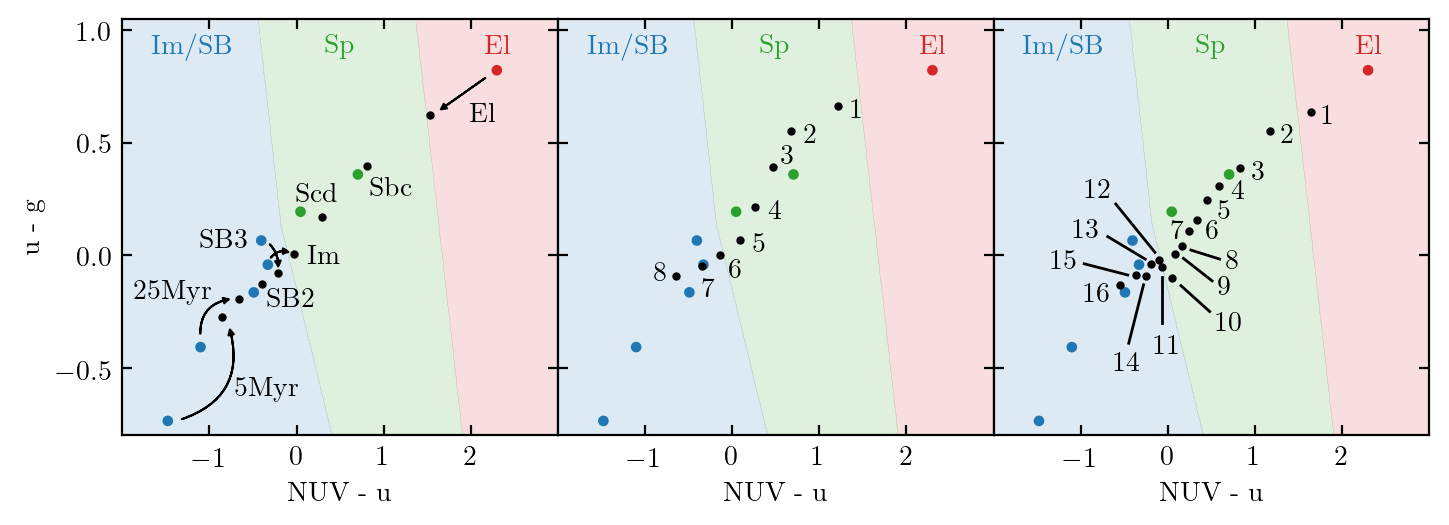

In [20]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(twocol,0.35*twocol),sharey='all')


for ax in [ax1,ax2,ax3]:

    ax.contourf(X,Y,Z,[0,0.5,2.5,10],colors=['C3','C2','C0'],alpha=0.15)

    ax.scatter(xcolor0,ycolor0,c=['C3','C2','C2','C0','C0','C0','C0','C0'],s=8)

    ax.set_xlim(-2,3)
    ax.set_ylim(-0.8,1.05)

    ax.set_xlabel('NUV - u')
    
    ax.set_xticks([-1,0,1,2])

    ax.text(-1.2,0.93,'Im/SB',c='C0',ha='center',va='center')
    ax.text(0.5,0.93,'Sp',c='C2',ha='center',va='center')
    ax.text(2.3,0.93,'El',c='C3',ha='center',va='center')
         
        
# The trained cwwsb4 template colors

ax = ax1

ax.scatter(xcolor0_trained,ycolor0_trained,c='k')

style="Simple,tail_width=0.01,head_width=2,head_length=2"
kw = dict(arrowstyle=style, color="k")
arrows = []
for i,(x,y) in enumerate(zip(xcolor0_trained,ycolor0_trained)):
    if i == 0:
        arrows.append(patches.FancyArrowPatch((xcolor0[i]-0.08,ycolor0[i]-0.02), (x+0.075,y+0.01),connectionstyle="arc3",lw=0.75,**kw))
        ax.annotate('El',(x+0.45,y-0.03))
    if i == 1:
        ax.annotate('Sbc',(x+0.04,y-0.13))
    if i == 2:
        ax.annotate('Scd',(x-0.3,y+0.07))
    if i == 3:
        arrows.append(patches.FancyArrowPatch((xcolor0[i],ycolor0[i]+0.01), (x,y),connectionstyle="arc3,rad=-0.5",lw=0.75,**kw))
        ax.annotate('Im',(x+0.15,y-0.04))
    if i == 4:
        arrows.append(patches.FancyArrowPatch((xcolor0[i]+0.05,ycolor0[i]), (x,y+0.005),connectionstyle="arc3,rad=-0.3",lw=0.75,**kw))
        ax.annotate('SB3',(xcolor0[i]-0.7,ycolor0[i]-0.03))
    if i == 5:
        ax.annotate('SB2',(xcolor0[i]+0.15,ycolor0[i]-0.06))
    if i == 6:
        arrows.append(patches.FancyArrowPatch((xcolor0[i],ycolor0[i]+0.035), (x-0.05,y),connectionstyle="arc3,rad=-0.5",lw=0.75,**kw))
        ax.annotate('25Myr',(x-1.2,y))
    if i == 7:
        arrows.append(patches.FancyArrowPatch((xcolor0[i]+0.1,ycolor0[i]), (x+0.07,y-0.03),connectionstyle="arc3,rad=.5",lw=0.75,**kw))
        ax.annotate('5Myr',(x+0.15,y-0.35))
        
for arrow in arrows:
    ax.add_patch(arrow)
    
ax.set_ylabel('u - g')   
    
    
# The 8 trained template colors

ax = ax2

ax.scatter(xcolor8,ycolor8,c='k')

for i,(x,y) in enumerate(zip(xcolor8,ycolor8)):
    if i == 2:
        ax.annotate(i+1,(x+0.1,y+0.02))
    if i <= 4 and i != 2:
        ax.annotate(i+1,(x+0.15,y-0.05))
    if i == 5:
        ax.annotate(i+1,(x+0.1,y-0.1))    
    if i == 6:
        ax.annotate(i+1,(x,y-0.135))
    if i == 7:
        ax.annotate(i+1,(x-0.26,y-0.02))
        

# The 16 template colors

ax = ax3

ax.scatter(xcolor16,ycolor16,c='k')

for i,(x,y) in enumerate(zip(xcolor16,ycolor16)):
    if i <= 3:
        ax.annotate(i+1,(x+0.13,y-0.05))
    if i == 4:
        ax.annotate(i+1,(x+0.13,y-0.08))
    if i == 5:
        ax.annotate(i+1,(x+0.1,y-0.08))    
    if i == 6:
        ax.annotate(i+1,(x-0.2,y-0.03))
    if i == 7:
        ax.annotate(i+1,(x+0.5,y-0.1))
        ax.plot([x+0.1,x+0.43],[y-0.02,y-0.06],c='k',lw=1)
    if i == 8:
        ax.annotate(i+1,(x+0.5,y-0.18))
        ax.plot([x+0.1,x+0.43],[y-0.02,y-0.12],c='k',lw=1)
    if i == 9:
        ax.annotate(i+1,(x+0.5,y-0.23))
        ax.plot([x+0.1,x+0.43],[y-0.035,y-0.15],c='k',lw=1)
    if i == 10:
        ax.annotate(i+1,(x-0.1,y-0.38))
        ax.plot([x,x],[y-0.045,y-0.25],c='k',lw=1)
    if i == 11:
        ax.annotate(i+1,(x-0.85,y+0.28))
        ax.plot([x-0.05,x-0.5],[y+0.035,y+0.25],c='k',lw=1)
    if i == 12:
        ax.annotate(i+1,(x-0.9,y+0.12))
        ax.plot([x-0.07,x-0.5],[y+0.02,y+0.12],c='k',lw=1)
    if i == 13:
        ax.annotate(i+1,(x-0.37,y-0.42))
        ax.plot([x-0.03,x-0.2],[y-0.04,y-0.3],c='k',lw=1)
    if i == 14:
        ax.annotate(i+1,(x-0.98,y+0.03))
        ax.plot([x-0.1,x-0.6],[y,y+0.05],c='k',lw=1)
    if i == 15:
        ax.annotate(i+1,(x-0.42,y-0.07))
        

fig.tight_layout(pad=0.2, h_pad=0, w_pad=0)
#fig.savefig('plots/color_classify.pdf')

plt.show()